<a href="https://colab.research.google.com/github/marcelaeyh/DSPS_MEcheverri/blob/main/HW2/Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior likelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [ ]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# TASK 1

**TASK 1:** Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.



In [ ]:
x = np.arange(-10, 20,0.1)
np.random.seed(617)

# a standard normal with mean 0, variance 1
Norm_0 = stats.norm.pdf(x,loc=0, scale=1)

# a standard normal with mean 10, variance 1
Norm_10 = stats.norm.pdf(x,loc=10, scale=1)

# a student's with 2 degrees of freedom centered on 0
tStudent_0 = stats.t.pdf(x,loc=0, df=2)

# a student's with 2 degrees of freedom centered on 10
tStudent_10 = stats.t.pdf(x,loc=10, df=2)

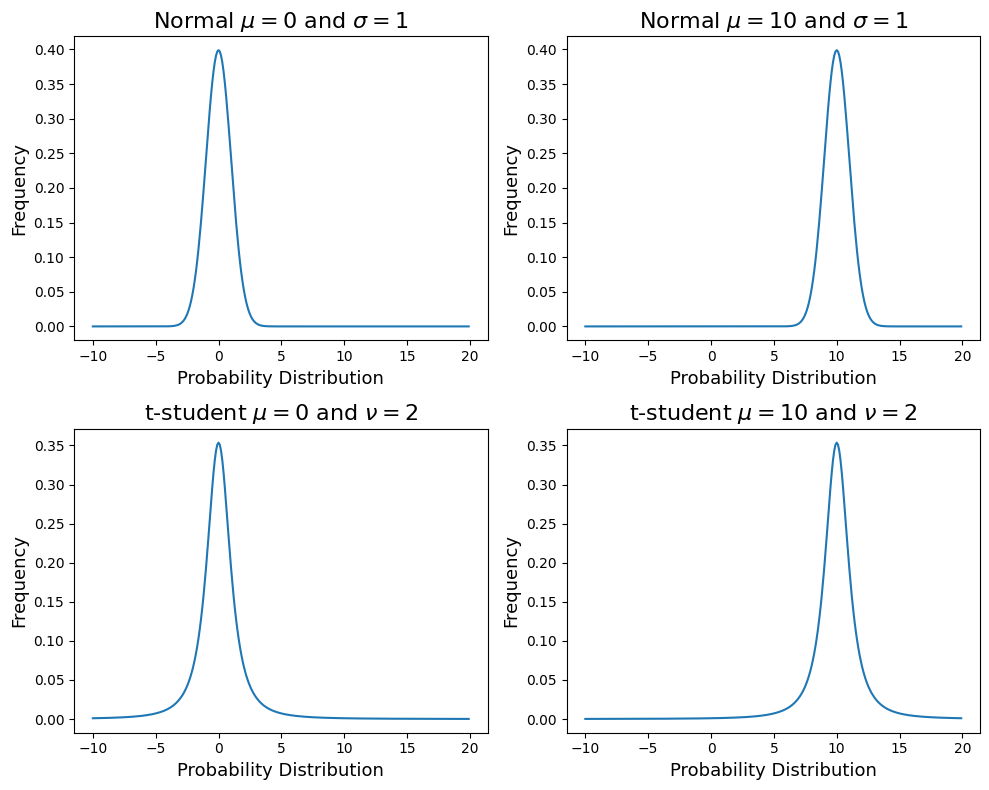

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.plot(x,Norm_0)
plt.title(r'Normal $\mu = 0$ and $\sigma = 1$',fontsize=16)
plt.xlabel('Probability Distribution',fontsize=13)
plt.ylabel('Frequency',fontsize=13)

plt.subplot(2,2,2)
plt.plot(x,Norm_10)
plt.title(r'Normal $\mu = 10$ and $\sigma = 1$',fontsize=16)
plt.xlabel('Probability Distribution',fontsize=13)
plt.ylabel('Frequency',fontsize=13)

plt.subplot(2,2,3)
plt.plot(x,tStudent_0)
plt.title(r't-student $\mu = 0$ and $\nu = 2$',fontsize=16)
plt.xlabel('Probability Distribution',fontsize=13)
plt.ylabel('Frequency',fontsize=13)

plt.subplot(2,2,4)
plt.plot(x,tStudent_10)
plt.title(r't-student $\mu = 10$ and $\nu = 2$',fontsize=16)
plt.xlabel('Probability Distribution',fontsize=13)
plt.ylabel('Frequency',fontsize=13)

plt.tight_layout()

# TASK 2
**TASK 2:** Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

In [ ]:
def posterior(prior, likelihood):
  normalized_prior = prior/sum(prior)
  normalized_likelihood = likelihood/sum(likelihood)
  this_posterior = normalized_prior * normalized_likelihood /sum(normalized_prior * normalized_likelihood)

  plt.plot(x,normalized_prior,color='k',ls='--',label='prior')
  plt.plot(x,normalized_likelihood,color='k',label='likelihood')
  plt.plot(x,this_posterior,color='red',label='posterior')

  plt.xlabel('Probability Distribution',fontsize=13)
  plt.ylabel('Frequency',fontsize=13)
  plt.legend()

# TASK 3
**TASK 3:** Pass to the function each combination of prior and likelihood between the four distributions you created: normal-normal, t-t, normal-t, t-normal.

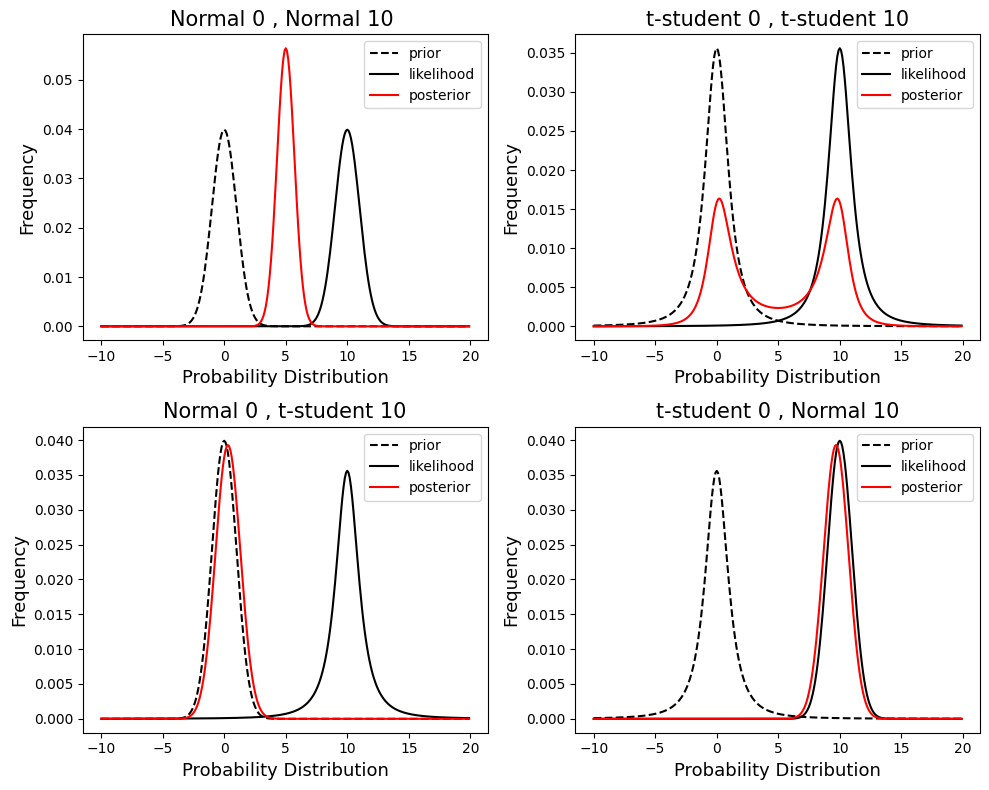

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
posterior(Norm_0,Norm_10)
plt.title(r'Normal 0 , Normal 10 ',fontsize=15)

plt.subplot(2,2,2)
posterior(tStudent_0,tStudent_10)
plt.title(r't-student 0 , t-student 10',fontsize=15)

plt.subplot(2,2,3)
posterior(Norm_0,tStudent_10)
plt.title(r'Normal 0 , t-student 10',fontsize=15)

plt.subplot(2,2,4)
posterior(tStudent_0,Norm_10)
plt.title(r't-student 0 , Normal 10',fontsize=15)

plt.tight_layout()